In [1]:
#std modules
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist,pdist,squareform
from scipy.stats import pearsonr
from sklearn import datasets,metrics
from sklearn.cluster import DBSCAN
import sklearn.preprocessing

%matplotlib inline

In [2]:
#import custom functions and classes
import myclusters2
import mymetrics2
import DBCV

In [3]:
#load iris data set
iris = datasets.load_iris()
Xns = iris.data
y = iris.target
print(y)
#scale to mean=0 and unit variance
X = sklearn.preprocessing.scale(Xns)
D = squareform(pdist(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Scikit-learn docs show passing of noise points as a normal cluster to ARI, see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [4]:
minPTS=tuple(range(4,21,2))
print(minPTS)
#minPTS=list()
#minPTS.append(2)
minD = np.min(D[D>0.])
maxD = np.max(D)
eps = np.linspace(minD,maxD,num=1000)
#print(eps)

(4, 6, 8, 10, 12, 14, 16, 18, 20)


In [5]:
RES = np.zeros((len(minPTS)*1000,5))
count = 0
for MM in minPTS:
    print("Doing minPTS=",MM)
    for EE in eps:
        estimator = DBSCAN(eps=EE, min_samples=MM,metric='euclidean')
        init_clusters  = estimator.fit_predict(X)
        centroids = mymetrics2.core2centers(X=X,clusters=init_clusters)
        size = [len(init_clusters[init_clusters==i]) for i in list(set(init_clusters))]
        #print(MM,EE,len(centroids),size)
        try:
            valid = DBCV.DBCV(clusters=init_clusters,metric="euclidean",NF=4,D=D)
        except:
            continue
        score = valid.calc_score(meas='acore')
        kscore = valid.calc_score(meas='kernel')
        #print(score,kscore)
        ARI = metrics.adjusted_rand_score(init_clusters,y)
        RES[count] = np.array((MM,EE,score,kscore,ARI))
        count += 1
        #break

Doing minPTS= 4
Doing minPTS= 6
Doing minPTS= 8
Doing minPTS= 10
Doing minPTS= 12
Doing minPTS= 14
Doing minPTS= 16
Doing minPTS= 18
Doing minPTS= 20


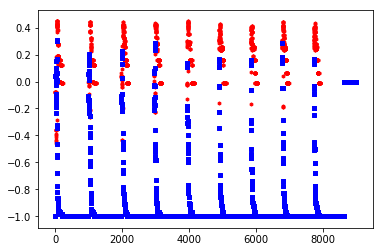

In [6]:
XX=np.arange(0,len(minPTS)*1000,1)
Y1=RES[:,2]
Y2=RES[:,3]
plt.scatter(XX,Y1,marker='h',s=10,color='r')
plt.scatter(XX,Y2,marker='s',s=10,color='b')

In [7]:
print("max DBCV_acore ",np.nanmax(RES[:,2]))
print("max ARI ",np.max(RES[:,4]))
wheremax = np.nanargmax(RES[:,2])
print("Best result DBCV acore",RES[wheremax])
wheremax = wheremax = np.nanargmax(RES[:,3])
print("Best result DBCV kernel",RES[wheremax])
mask = np.isnan(RES[:,2])
print(mask)
print(pearsonr(RES[~mask,2],RES[~mask,4]))
mask = np.isnan(RES[:,3])
print(pearsonr(RES[~mask,3],RES[~mask,4]))

max DBCV_acore  0.447042304831
max ARI  0.568115942029
Best result DBCV acore [ 4.          0.53228633  0.4470423  -0.54242115  0.45750611]
Best result DBCV kernel [ 4.          0.4487779   0.4038245   0.30586692  0.42723312]
[False False False ..., False False False]
(0.87768593796452365, 0.0)
[False False False ..., False False False]
(0.12333070317917959, 7.6346220603783732e-32)
